In [55]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from arch import arch_model
import os
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [56]:
# Read the CSV file
data = pd.read_csv('prices.csv')
data

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [57]:
#function to calculate volatility for every timestamp of a particular ticker
def rolling_preds(tickerdata):
    roll_preds = []
    test_size = len(tickerdata)

    for i in range(test_size):
        train = tickerdata['returns'][:i+1]
        #print("train:", train)  # Add this line for debugging
        model = arch_model(train, p = 2, q = 1)
        model_fit = model.fit(disp='off')
        pred = model_fit.forecast(horizon=1)
        roll_preds.append(np.sqrt(pred.variance.values[-1,:][0]))
        
    return roll_preds

#function to calculate volatility at every time stamp for every ticker
def predict_volatility_for_ticker(data):
    # group data by ticker symbol
    grouped_data = data.groupby('symbol')
    for ticker, ticker_data in grouped_data:
        print("TICKER: ", ticker)
        # Generate rolling volatility predictions
        predictions = rolling_preds(ticker_data)
        # Add predictions to DataFrame
        data.loc[data.index.isin(ticker_data.index), 'forecasted_volatility'] = predictions
        
        #print("Forecasted Volatility for", ticker, ":", predictions)
    return data

In [58]:
data['returns'] = ((data.close - data.open) / data.open) * 100
data = predict_volatility_for_ticker(data[data['symbol'].isin(['NFLX', 'DIS', 'CMCSA'])])

TICKER:  CMCSA


C:\Users\kraus\anaconda3\envs\Strat\lib\site-packages\arch\univariate\volatility.py:1197: RuntimeWarning: invalid value encountered in scalar divide
  scale = np.mean(resids**2) / (target ** (2.0 / power))
C:\Users\kraus\anaconda3\envs\Strat\lib\site-packages\arch\univariate\distribution.py:451: RuntimeWarning: divide by zero encountered in log
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
C:\Users\kraus\anaconda3\envs\Strat\lib\site-packages\arch\univariate\distribution.py:451: RuntimeWarning: invalid value encountered in divide
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
C:\Users\kraus\anaconda3\envs\Strat\lib\site-packages\arch\univariate\distribution.py:451: RuntimeWarning: divide by zero encountered in divide
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
C:\Users\kraus\anaconda3\envs\Strat\lib\site-packages\arch\univariate\distribution.py:451: RuntimeWarning: invalid value encountered in add
  lls = -0.5 * (log(2 

TICKER:  DIS
TICKER:  NFLX


C:\Users\kraus\anaconda3\envs\Strat\lib\site-packages\arch\univariate\volatility.py:1197: RuntimeWarning: invalid value encountered in scalar divide
  scale = np.mean(resids**2) / (target ** (2.0 / power))
C:\Users\kraus\anaconda3\envs\Strat\lib\site-packages\arch\univariate\distribution.py:451: RuntimeWarning: divide by zero encountered in log
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
C:\Users\kraus\anaconda3\envs\Strat\lib\site-packages\arch\univariate\distribution.py:451: RuntimeWarning: invalid value encountered in divide
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
C:\Users\kraus\anaconda3\envs\Strat\lib\site-packages\arch\univariate\distribution.py:451: RuntimeWarning: divide by zero encountered in divide
  lls = -0.5 * (log(2 * pi) + log(sigma2) + resids ** 2.0 / sigma2)
C:\Users\kraus\anaconda3\envs\Strat\lib\site-packages\arch\univariate\distribution.py:451: RuntimeWarning: invalid value encountered in add
  lls = -0.5 * (log(2 

In [59]:
data

,date,symbol,open,close,low,high,volume,returns,forecasted_volatility
340,2010-01-04,CMCSA,16.750000,16.969999,16.750000,17.129999,13573400.0,1.313427,0.000000
374,2010-01-04,DIS,32.500000,32.070000,31.870001,32.750000,13700400.0,-1.323077,0.000000
555,2010-01-04,NFLX,55.519999,53.479999,52.960001,55.730000,17239600.0,-3.674352,0.000000
808,2010-01-05,CMCSA,16.930000,16.740000,16.549999,16.980000,17746500.0,-1.122268,1.217848
842,2010-01-05,DIS,32.070000,31.990000,31.700001,32.160000,10307700.0,-0.249454,0.536811
...,...,...,...,...,...,...,...,...,...
850393,2016-12-29,DIS,104.230003,104.559998,103.870003,104.769997,5892000.0,0.316603,0.789655
850588,2016-12-29,NFLX,125.949997,125.330002,124.199997,126.139999,3443700.0,-0.492255,1.745248
850857,2016-12-30,CMCSA,69.949997,69.050003,68.930000,70.050003,12188400.0,-1.286625,1.021556
850893,2016-12-30,DIS,104.570000,104.220001,103.959999,105.000000,6629500.0,-0.334703,0.778195


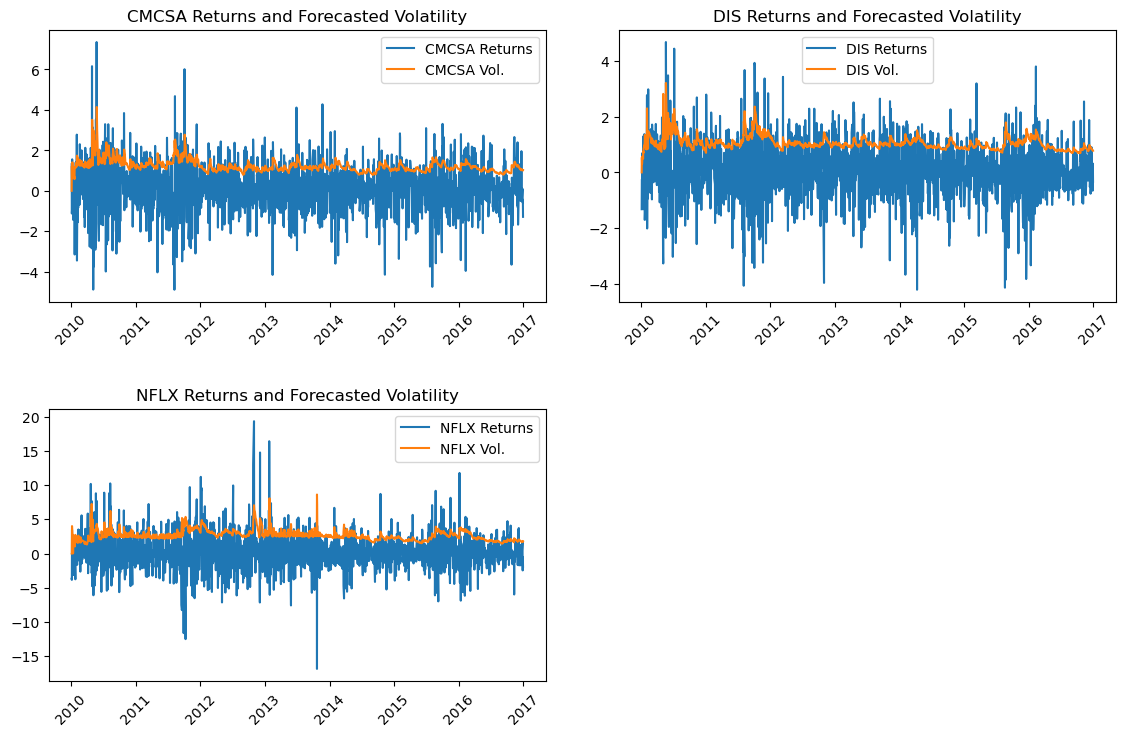

In [63]:
# Define symbols to iterate over
symbols = data['symbol'].unique()

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Iterate over symbols and plot data
for i, symbol in enumerate(symbols):
    symbol_data = data[data['symbol'] == symbol]
    dates = pd.to_datetime(symbol_data['date'], format='%Y-%m-%d')
    
    # Plot true returns
    true, = axes[i // 2, i % 2].plot(dates, symbol_data['returns'], label=f'{symbol} Returns')
    # Plot forecasted volatility
    preds, = axes[i // 2, i % 2].plot(dates, symbol_data['forecasted_volatility'], label=f'{symbol} Vol.')
    # Set subplot title
    axes[i // 2, i % 2].set_title(f'{symbol} Returns and Forecasted Volatility')
    # Add legend
    axes[i // 2, i % 2].legend()
    # Rotate x-axis labels for better visibility
    axes[i // 2, i % 2].tick_params(axis='x', rotation=45)

# Adjust layout for better spacing
plt.tight_layout(pad=3.0)

# Hide unused plot
axes[1,1].set_visible(False)

# Show the plot
plt.show()

In [61]:
data.to_csv('prices_and_volforecast.csv', index=False)